In [1]:
# Import necessary libraires
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Run the data download + preprocessing pipeline (creates the cleaned dataset / processed variables)
%run data_download_preprocessing.py

Key '1470698484816187620' not in persistent cache.
Key '-1128132638115728682' not in persistent cache.
Key '-8596957551138811892' not in persistent cache.
Key '4793312004637458658' not in persistent cache.
Key '649192034202416493' not in persistent cache.
Key '8312381519185342927' not in persistent cache.
Key '-8712805881970143150' not in persistent cache.
Key '-813721573569951666' not in persistent cache.
Key '-4504012829523721492' not in persistent cache.
Key '2705347940977932603' not in persistent cache.
Key '3322508137326002212' not in persistent cache.
Key '1753321534839691526' not in persistent cache.
Key '-323000192746134090' not in persistent cache.
Key '-7791825105769217300' not in persistent cache.
Key '5598444450007053250' not in persistent cache.
Key '1454324479572011085' not in persistent cache.
Key '9117513964554937519' not in persistent cache.
Key '-7907673436600548558' not in persistent cache.
Key '-8589128200357074' not in persistent cache.
Key '699476998830241228' not

Fetching data from the World Bank API


Data loaded into memory
Data has been cleaned (missing values handled and type mismatches fixed) and saved to 'world_bank_data_clean_1.csv'.
Final dataset shape: 9636 rows × 12 columns.


In [3]:
# Basic peek
pd.set_option("display.float_format", "{:,.2f}".format)
print("Shape (rows, cols):", world_bank_data.shape)

print("\nColumns:")
print(world_bank_data.columns.tolist())

print("\nHead:")
display(world_bank_data.head())

Shape (rows, cols): (9768, 12)

Columns:
['country', 'year', 'GDPpc_2017$', 'Population_total', 'Life_expectancy', 'Literacy_rate', 'Unemploymlent_rate', 'Fertility_rate', 'Poverty_ratio', 'Primary_school_enrolmet_rate', 'Energy_use', 'Exports_2017$']

Head:


,country,year,GDPpc_2017$,Population_total,Life_expectancy,Literacy_rate,Unemploymlent_rate,Fertility_rate,Poverty_ratio,Primary_school_enrolmet_rate,Energy_use,Exports_2017$
0,Afghanistan,1980,"1,617.83","13,169,311.00",39.26,31.45,8.07,7.64,33.70,43.81,813.37,"295,304,643.40"
1,Afghanistan,1981,"1,617.83","11,937,581.00",39.41,31.45,8.07,7.62,33.70,49.46,813.37,"295,304,643.40"
2,Afghanistan,1982,"1,617.83","10,991,378.00",36.06,31.45,8.07,7.60,33.70,20.14,813.37,"295,304,643.40"
3,Afghanistan,1983,"1,617.83","10,917,982.00",36.52,31.45,8.07,7.57,33.70,22.39,813.37,"295,304,643.40"
4,Afghanistan,1984,"1,617.83","11,190,221.00",31.47,31.45,8.07,7.55,33.70,24.65,813.37,"295,304,643.40"


In [4]:
# Numeric-only summary (usually what we care about for ML)
#num_cols = world_bank_data.select_dtypes(include="number").columns
#num_cols = num_cols.drop("year", errors="ignore")
print(world_bank_data[numeric_cols].describe().T)

                                count               mean                std  \
GDPpc_2017$                  9,768.00          23,316.35          25,404.12   
Population_total             9,768.00      40,646,766.48     142,625,135.41   
Life_expectancy              9,768.00              68.13               9.85   
Literacy_rate                9,768.00              82.70              19.05   
Unemploymlent_rate           9,768.00               7.90               5.95   
Fertility_rate               9,768.00               3.29               1.77   
Poverty_ratio                9,768.00              27.90              16.83   
Primary_school_enrolmet_rate 9,768.00              98.96              18.95   
Energy_use                   9,768.00           2,055.07           2,554.81   
Exports_2017$                9,768.00 111,561,375,891.55 253,044,017,443.94   

                                      min              25%               50%  \
GDPpc_2017$                        510.82         

In [5]:
# Countries and years count
if "country" in world_bank_data.columns and "year" in world_bank_data.columns:
    print("Unique countries:", world_bank_data["country"].nunique())
    print("Year range:", world_bank_data["year"].min(), "to", world_bank_data["year"].max())

Unique countries: 222
Year range: 1980 to 2023


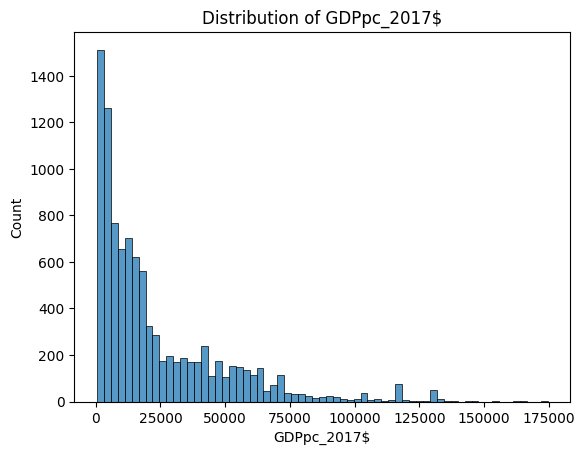

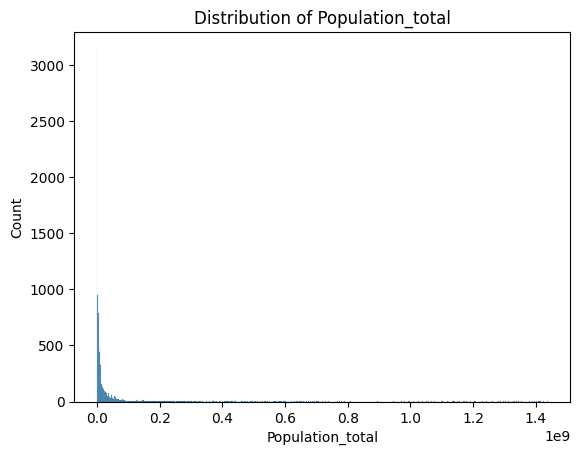

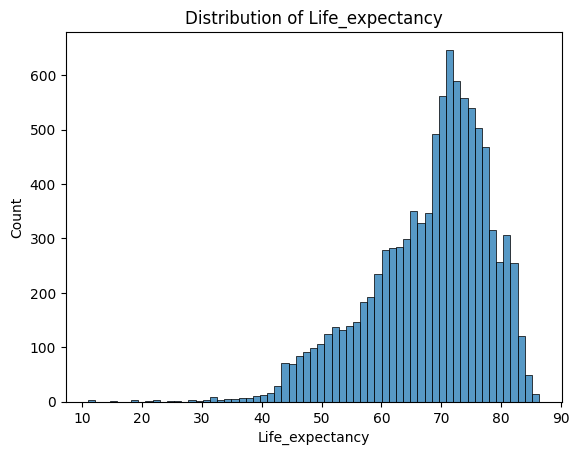

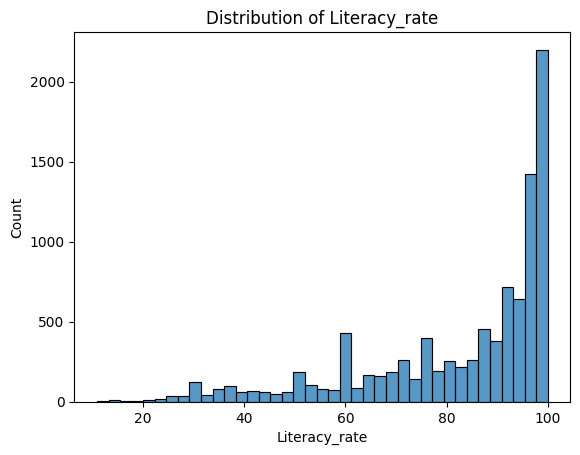

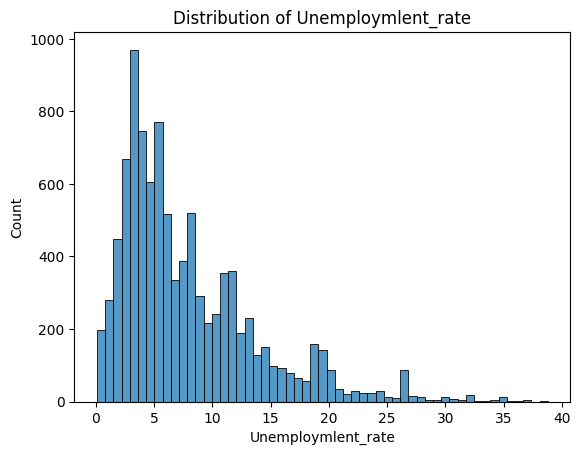

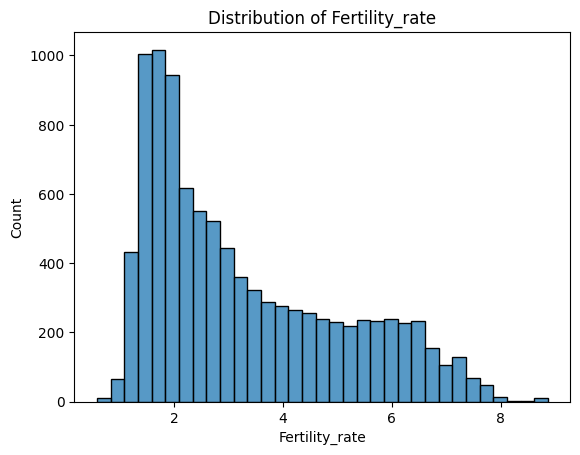

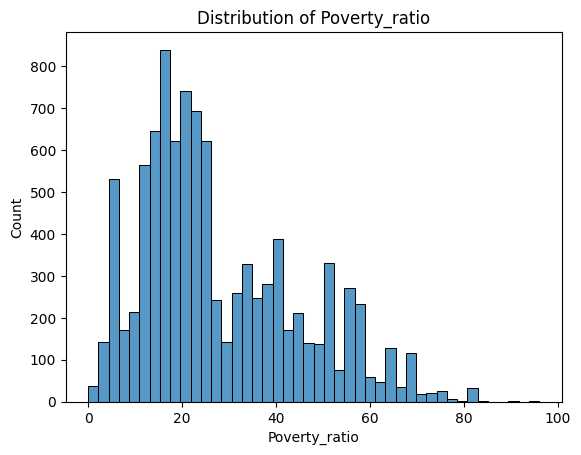

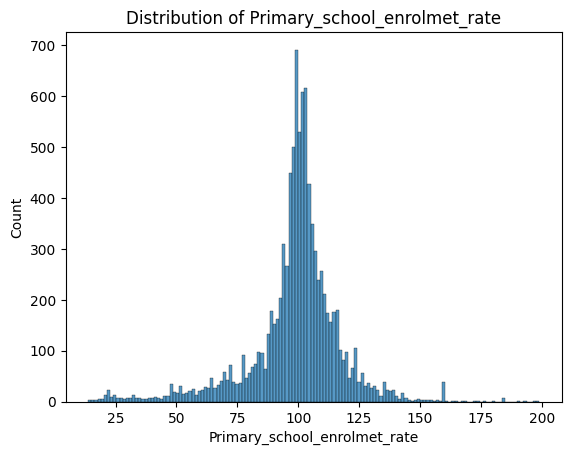

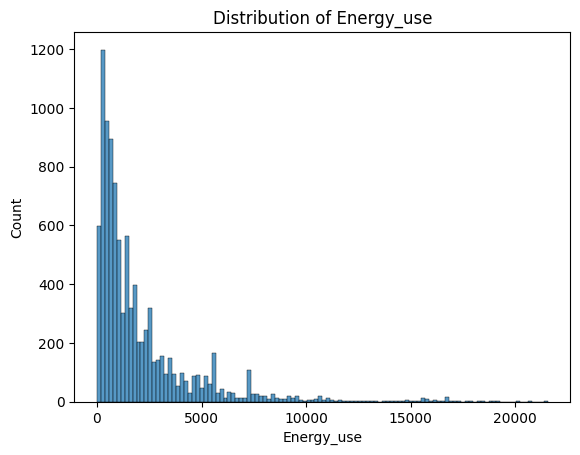

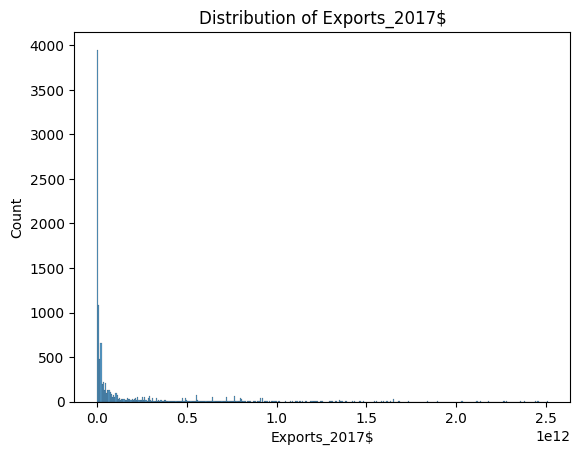

In [6]:
# Loop through every numeric column and plot a histogram
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=world_bank_data, x=col, bins="auto")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

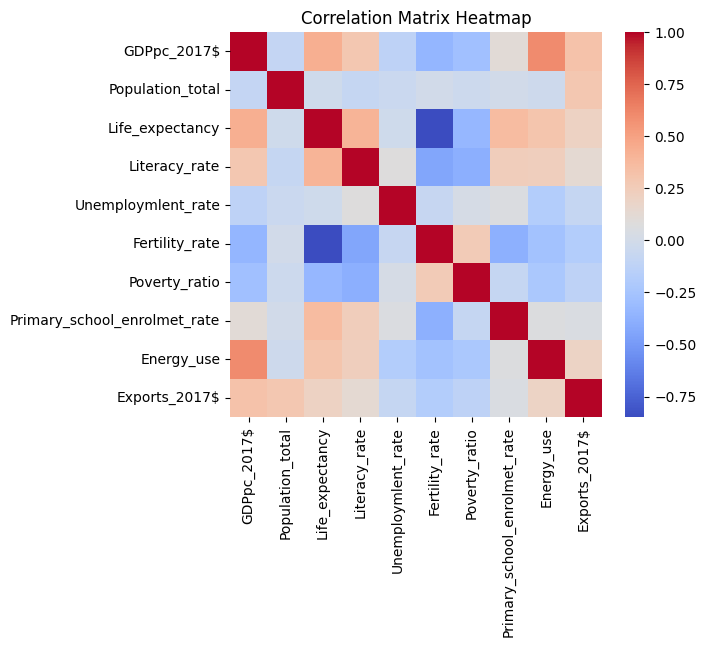

In [7]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 5))
correlation_matrix = world_bank_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()